In [1]:
%matplotlib inline
import cv2

In [2]:
from gluoncv import model_zoo, data, utils
from matplotlib import pyplot as plt

In [3]:
### both models loaded ( SSD and Faster RCNN)
ssd_net = model_zoo.get_model('ssd_512_resnet50_v1_voc', pretrained=True)
faster_rcnn_net = model_zoo.get_model('faster_rcnn_resnet50_v1b_voc', pretrained=True)

C:\Users\K\anaconda\lib\site-packages\mxnet\gluon\block.py:1389: UserWarning: Cannot decide type for the following arguments. Consider providing them as input:
	data: None
  input_sym_arg_type = in_param.infer_type()[0]


100%|██████████| 132723/132723 [00:22<00:00, 5839.90KB/s]


121888KB [00:20, 5904.72KB/s]                            


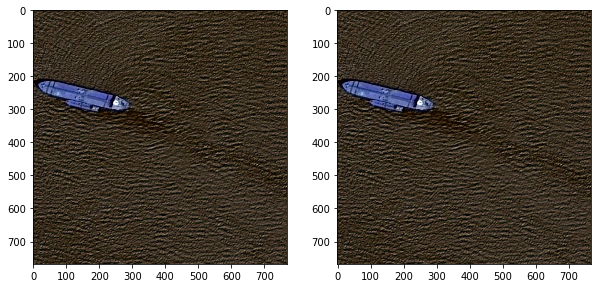

In [13]:
## testing SSD on images
imagePathList = []
imagesPath = "validation"
rcnn_bbox = {}
for dir,_, files in os.walk(imagesPath):
    print(len(files))
    for i in tqdm(list(range(len(files)))):
        imagePath = imagesPath +"\\"+ files[i]
        x_rcnn, img_rcnn = data.transforms.presets.rcnn.load_test(imagePath, short=512)
        class_IDs, scores, bounding_boxes = faster_rcnn_net(x)
        bb = bounding_boxes[0].asnumpy()
        rcnn_bbox[files[i]] = bb
#         print(bb.shape)
#         print(bb)
#         print(bb[0][0])
#         print(scores[0][0])

        
##########TESTING ON RANDOM IMAGE########################
       
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

image = cv2.imread("validation\\2cad2e81a.jpg")
ax1.imshow(image)
x_rcnn, img_rcnn = data.transforms.presets.rcnn.load_test("validation\\2cad2e81a.jpg", short=512)
class_IDs, scores, bounding_boxes = faster_rcnn_net(x)
bb = bounding_boxes[0].asnumpy()
cv2.rectangle(image, (bb[0][1],bb[0][0]), (bb[0][3],bb[0][2]), (255,99,71), 3, 1)

ax2.imshow(image)

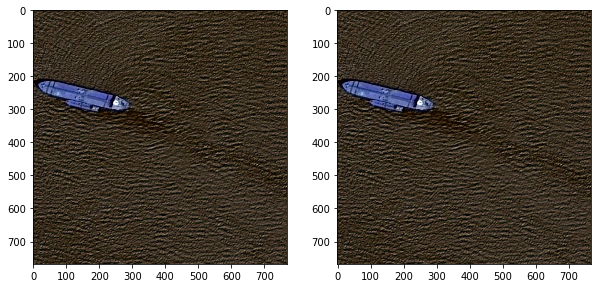

In [15]:
## testing Faster RCNN on images
imagePathList = []
imagesPath = "validation"
ssd_bbox = {}
for dir,_, files in os.walk(imagesPath):
    print(len(files))
    for i in tqdm(list(range(len(files)))):
        imagePath = imagesPath +"\\"+ files[i]
        x_rcnn, img_rcnn = data.transforms.presets.ssd.load_test(imagePath, short=512)
        class_IDs, scores, bounding_boxes = ssd_net(x)
        bb = bounding_boxes[0].asnumpy()
        ssd_bbox[files[i]] = bb
#         print(bb.shape)
#         print(bb)
#         print(bb[0][0])
#         print(scores[0][0])

##########TESTING ON RANDOM IMAGE########################        

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

image = cv2.imread("validation\\2cad2e81a.jpg")
ax1.imshow(image)
x_rcnn, img_rcnn = data.transforms.presets.rcnn.load_test("validation\\2cad2e81a.jpg", short=512)
class_IDs, scores, bounding_boxes = faster_rcnn_net(x)
bb = bounding_boxes[0].asnumpy()
cv2.rectangle(image, (bb[0][1],bb[0][0]), (bb[0][3],bb[0][2]), (255,99,71), 3, 1)

ax2.imshow(image)